# Publicação usando Quarto

Quarto se trata de um conjunto de ferramentas que permite a utilização combinada com deferentes linguagens (Python, R, Julia) e IDE (VS Studio, RStudio, Jupyter, editor de texto) para publicação dos notebooks (codificação, markdown e marcações Pandoc) para diversos formatos: HTML, PDF, Word, ePub, OpenOffice, Revealjs, PowerPoint, entre outros


Instalação: https://quarto.org/docs/get-started/ (por incluir ferramentas queu vão além da IDE ou da linguagem, exige instalação via executável)

Após instalação, o Notebook tradicional pode ser adaptado para permitir a publicação. O ato de publicar, em uma linguagem como o Python envolve a renderização do código. Em Quarto, utilizaremos as células do tipo Raw para incluir as informações adicionais.

Células Raw são células que são ignoradas pelos kernel e utilizadas somente no processo de renderização.

No momento da renderização, utilizaremos o Terminal para execução de código quarto:
- quarto render nome_arquivo.ipynb --to html (pdf, docx, epub, pptx)
- quarto preview nome_arquivo.ipynb --to html (deve ser utilizado durante a construção do código, para visualização prévia)


## Dados de formato (célula Raw)

Nesta parte do notebook incluimos informações úteis na renderização

## Resultados da análise

### Projetos de investimento

Importação dos dados do arquivo projetos.csv utilizando o pacote pandas. Apresentação dos dados na @tbl-projetos

In [9]:
#| label: tbl-projetos
#| echo: true
#| tbl-cap: "Dados das 5 alternativas de investimento"

import pandas as pd  

arquivo = "projetos.csv" 
df = pd.read_csv(arquivo, sep=';') 

#apresentação das primeiras linhas para checar se a leitura ocorreu corretamente
df.head()

,mes,ano,Projeto1,Projeto2,Projeto3,Projeto4,Projeto5
0,1,2021,35000,33000,65000,30000,27660
1,2,2021,32500,42600,53000,39000,24999
2,3,2021,26700,35800,48000,36000,27104
3,4,2021,24000,28700,58000,27000,27487
4,5,2021,19000,35200,49000,32000,30394


Atualização da DataFrame, adicionando mais uma linha ao final com os dados referentes ao mês de dezembro de 2022. Depois apresente as últimas linhas da df para checar se ocorreu como deveria

mes | ano | Projeto1 | Projeto2 | Projeto3 | Projeto4 | Projeto5
--- | --- | -------- | -------- | -------- | -------- | --------
12 | 2022 | 29376 | 40392 | 63648 | 29376 | 25704

obs: a partir deste ponto, utilize a df atualizada, agora com 24 meses de dados

In [3]:
df1 = pd.DataFrame({'mes': [12], 'ano': [2022], 'Projeto1': [29376], 'Projeto2': [40392], 'Projeto3': [63648], 'Projeto4': [29376], 'Projeto5': [25704] })
df = df.append(df1)
print(df.tail())

    mes   ano  Projeto1  Projeto2  Projeto3  Projeto4  Projeto5
19    8  2022     25375     33516     48452     29970     29878
20    9  2022     23200     36980     65000     32000     25878
21   10  2022     24206     32575     48020     30380     25588
22   11  2022     27886     40629     69993     31108     32837
0    12  2022     29376     40392     63648     29376     25704


C:\Users\wesley.almeida.GRUPOMARISTA\AppData\Local\Temp\ipykernel_7620\1171443668.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)


In [16]:
#| label: tbl-soma
#| tbl-cap: "Dados das 5 alternativas de investimento agrupadas por ano"
# soma dos valores de cada projeto agrupado por ano
df.groupby('ano').sum()

,mes,Projeto1,Projeto2,Projeto3,Projeto4,Projeto5
ano,,,,,,
2021,78,305500,425230,656600,377500,330677
2022,78,330083,457698,708030,404890,354970


Gráfico de dispersão dos dados do Projeto1 e Projeto2 na @fig-dispersao

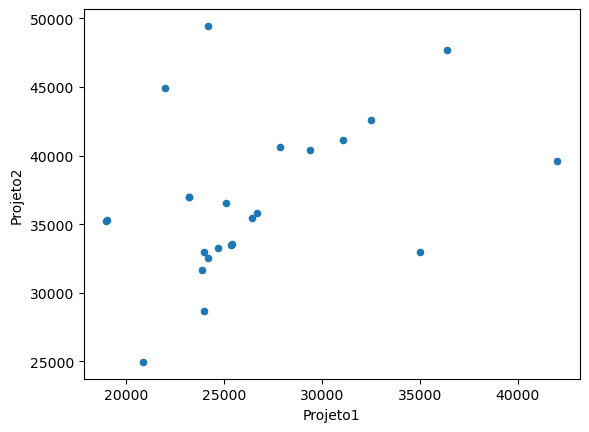

In [8]:
#| label: fig-dispersao
#| fig-cap: "Gráfico de dispersão dos dados do Projeto1 e Projeto2"

# gráfico de dispersão cruzando os dados do Projeto1 e Projeto2
import matplotlib.pyplot as plt
df.plot(kind = 'scatter', x = 'Projeto1', y = 'Projeto2')
plt.show()

<Axes: ylabel='Frequency'>

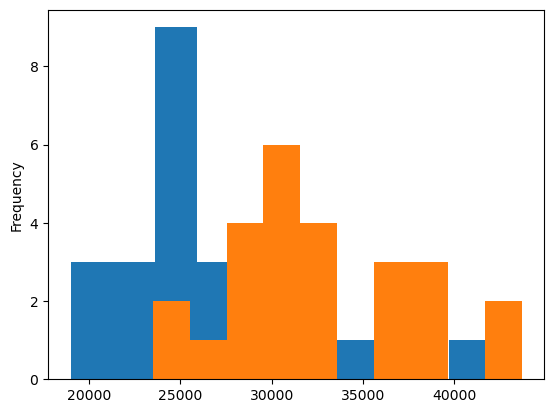

In [21]:
#| label: fig-hist
#| fig-cap: "Gráfico de histograma com os dados do Projeto 1 e Projeto4"

# Dica: Ao criar dois histograma em sequência, o python agrupa em apenas um desenho
df["Projeto1"].plot(kind = 'hist')
df["Projeto4"].plot(kind = 'hist')

### Taxas de Juros - IPEADATA

In [22]:
#| label: tbl-indicadores
#| tbl-cap: "Relação de indicadores relacionados a taxa de juros Selic"

import ipeadatapy as ip

# busca na base do IPEADATA indicadores relacionados a taxa de juros Selic
ip.list_series('Selic')

,CODE,NAME
936,BM12_TFPPNCN12,Meio de pagamento ampliado - M4 - títulos fed...
937,BM12_TFPPNCNY12,Meio de pagamento ampliado - M4 - títulos fede...
3079,BM12_TPFOVER12,Títulos - federais - indexados à Over / Selic ...
3080,BM12_TPFOVERMA12,Dívida mobiliária federal - participação index...
7542,PAN_TJOVER,Taxa de juros nominal - Over / Selic
7563,PAN12_TJOVER12,Taxa de juros nominal - Over / Selic
7588,PAN4_TJOVER4,Taxa de juros nominal - Over / Selic
8603,BM12_TJOVER12,Taxa de juros - Over / Selic - acumulada no mês
8608,BM366_TJOVER366,Taxa de juros - Selic - fixada pelo Copom
8622,GM366_TJOVER366,Taxa de juros - Over / Selic


In [24]:
#| label: tbl-selic
#| tbl-cap: "Apresentação dos valores do indicador 'Taxa de juros - Over / Selic - acumulada no mês' dos anos de 2021 e 2022"
selic = ip.timeseries('BM12_TJOVER12', yearGreaterThan=2020, yearSmallerThan=2023)
selic

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
DATE,,,,,,
2021-01-01,BM12_TJOVER12,2021-01-01T00:00:00-03:00,1,1,2021,0.15
2021-02-01,BM12_TJOVER12,2021-02-01T00:00:00-03:00,1,2,2021,0.13
2021-03-01,BM12_TJOVER12,2021-03-01T00:00:00-03:00,1,3,2021,0.20
2021-04-01,BM12_TJOVER12,2021-04-01T00:00:00-03:00,1,4,2021,0.21
2021-05-01,BM12_TJOVER12,2021-05-01T00:00:00-03:00,1,5,2021,0.27
2021-06-01,BM12_TJOVER12,2021-06-01T00:00:00-03:00,1,6,2021,0.31
2021-07-01,BM12_TJOVER12,2021-07-01T00:00:00-03:00,1,7,2021,0.36
2021-08-01,BM12_TJOVER12,2021-08-01T00:00:00-03:00,1,8,2021,0.43
2021-09-01,BM12_TJOVER12,2021-09-01T00:00:00-03:00,1,9,2021,0.44


Geração de dois gráficos de linha, meses e valores das taxas, um para o ano de 2021 (@fig-taxa1) e outro para o ano de 2022 (@fig-taxa2)

<Axes: xlabel='MONTH'>

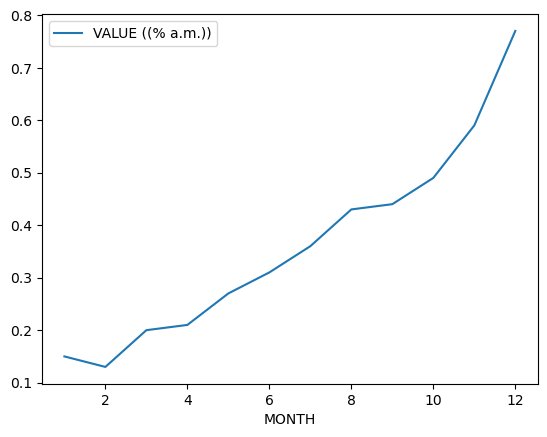

In [29]:
#| label: fig-taxa1
#| fig-cap: "Taxa de juros em 2021"

ip.timeseries('BM12_TJOVER12', year=2021).plot("MONTH", "VALUE ((% a.m.))")

<Axes: xlabel='MONTH'>

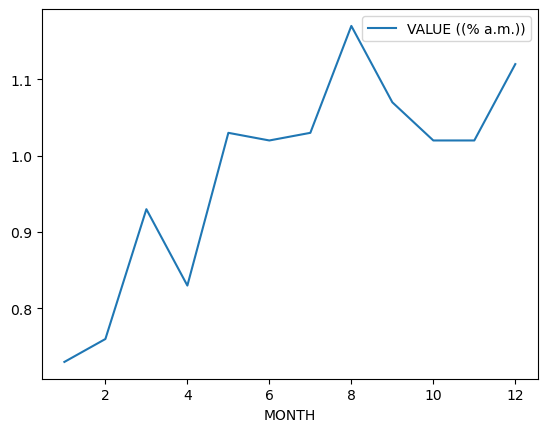

In [ ]:
#| label: fig-taxa2
#| fig-cap: "Taxa de juros em 2022"

ip.timeseries('BM12_TJOVER12', year=2022).plot("MONTH", "VALUE ((% a.m.))")

### Projetos + Taxas de Juros

In [9]:
# Criação de duas variáveis do tipo lista com a série de dados do Projeto5 e os valores da taxa Selic
ListaP5 = list(df['Projeto5'])
ListaSelic = list(selic['VALUE ((% a.m.))'])
print(ListaP5)
print()
print(ListaSelic)

[27660, 24999, 27104, 27487, 30394, 30469, 30112, 29908, 25878, 26110, 29556, 21000, 33192, 27999, 26833, 23914, 30485, 33516, 39146, 29878, 25878, 25588, 32837, 25704]

[0.15, 0.13, 0.2, 0.21, 0.27, 0.31, 0.36, 0.43, 0.44, 0.49, 0.59, 0.77, 0.73, 0.76, 0.93, 0.83, 1.03, 1.02, 1.03, 1.17, 1.07, 1.02, 1.02, 1.12]


Cálculo do VPL (Valor Presente Líquido) do Projeto5, utilizando a taxa Selic mensal:
- VP(Valor Presente) = ReceitaMês - ( ReceitaMês * (SelicMês/100) * nºperíodos )
- VP total = soma do VP de cada mês
- VPL(Valor Presente Líquido) = VP total - Investimento Inicial

Obs: Para o Projeto5, o investimento inicial é de 160000


In [10]:
VP = 0
for i in range(0,24):
    VP = VP + (ListaP5[i] - (ListaP5[i] * (ListaSelic[i]/100) * i))
print('VPL do Projeto 5:', round(VP - 160000,2))

VPL do Projeto 5: 455508.05
